In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Data = pd.read_csv("/content/Housing Price data set.csv",index_col = 0)
Data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [ ]:
Data['driveway'] = Data['driveway'].map({'yes': 1, 'no': 0})
Data['recroom'] = Data['recroom'].map({'yes': 1, 'no': 0})
Data['fullbase'] = Data['fullbase'].map({'yes': 1, 'no': 0})
Data['gashw'] = Data['gashw'].map({'yes': 1, 'no': 0})
Data['airco'] = Data['airco'].map({'yes': 1, 'no': 0})
Data['prefarea'] = Data['prefarea'].map({'yes': 1, 'no': 0})

In [ ]:
Y = Data["price"]
Y_train = Y.iloc[:500]
Y_test = Y.iloc[500:]
Y_train = Y_train.to_numpy()

In [ ]:
X = Data.iloc[:,1:]
#X.head()

In [ ]:
X['x0'] = 1
X= X[['x0','lotsize','bedrooms','bathrms','stories','driveway','recroom','fullbase','gashw','airco','prefarea']]

In [ ]:
X_train = X.iloc[:500,:]
X_test = X.iloc[500:,:]
X_train = X_train.to_numpy()


In [ ]:
xxt = np.matmul(X_train.T,X_train)
xxy = np.matmul(X_train.T,Y_train)
xxi = np.linalg.inv(xxt)
theta = np.matmul(xxi,xxy)

In [ ]:
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
y_predicted = np.matmul(theta,X_test.T)

In [ ]:
#print(len(Y_test))
#print(len(y_predicted))

In [ ]:
error = y_predicted - Y_test
error.mean()

-2522.5332444578166

## Regularization

In [ ]:
I = np.identity(11)
I[0][0] = 0
lmda = 2


In [ ]:
xxt = xxt + lmda*I

In [ ]:
xxi = np.linalg.inv(xxt)
new_theta = np.matmul(xxi,xxy)
new_theta

array([-6.97284502e+03,  4.15307684e+00,  2.57478776e+03,  1.49663191e+04,
        5.84497307e+03,  7.51220332e+03,  3.94201272e+03,  6.00610127e+03,
        1.36287001e+04,  1.26056241e+04,  9.27438878e+03])

In [ ]:
new_y_predicted = np.matmul(new_theta,X_test.T)
new_error = new_y_predicted - Y_test
new_error
new_error.mean()

-2557.053863041645

## Gradient Descedent 

In [ ]:
X = Data.iloc[:,1:3]
Y = Data["price"]
X = (X - X.mean())/X.std()
Y = (Y - Y.mean())/Y.std()
#print(X.head())
#print(Y.head())

In [ ]:
def computeCost(X,y,theta):
    m = len(y)
    y_pr = X.dot(theta)
    cost = (1/2*m)*np.sum(np.square(y-y_pr))
    return cost

In [ ]:
#gradient descent
cl = []

def gradientDescent(X,y,theta,iters,alpha):
    m = len(y)
    for it in range(iters):
        y_pred = np.dot(X,theta)
        theta = theta - (1/m)*alpha*(X.T.dot((y_pred-y)))
        cost = computeCost(X,y,theta)
        cl.append(cost)
    return theta,cost

theta = np.array([0,0,0])
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost = gradientDescent(X_b,Y,theta,100,0.01)

[-1.33731040e-16  3.25602005e-01  2.11257967e-01]
99357.87531851219


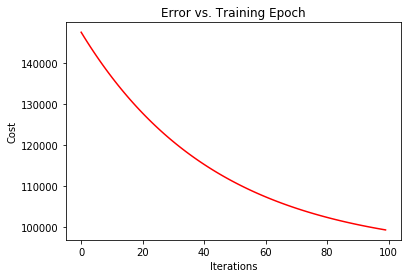

In [ ]:
print(theta)
print(cost)
plt.plot(np.arange(100), cl, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Cost') 
plt.title('Error vs. Training Epoch') 
plt.show()


## Gradient Descent with regularization

In [ ]:
def computeCost(X,y,theta,lmd):
    m = len(y)
    y_pr = X.dot(theta)
    cost = (1/2*m)*np.sum(np.square(y-y_pr)) + (lmd/2*m)*np.sum(np.square(theta))
    return cost

#gradient descent
cl1 = []
t = []
def gradientDescent(X,y,theta,iters,alpha,lmd):
    m = len(y)
    for it in range(iters):
        y_pred = np.dot(X,theta)
        theta = theta - (1/m)*alpha*((X.T.dot((y_pred-y))) + (lmd/m)*(theta))
        cost = computeCost(X,y,theta,lmd)
        #t.append(theta)
        cl1.append(cost)
    return theta,cost

theta = np.array([0,0,0])
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost = gradientDescent(X_b,Y,theta,100,.01,5)


In [ ]:
print(theta)
print(cost)

[-1.33884260e-16  3.25599769e-01  2.11256553e-01]
99563.66812937029


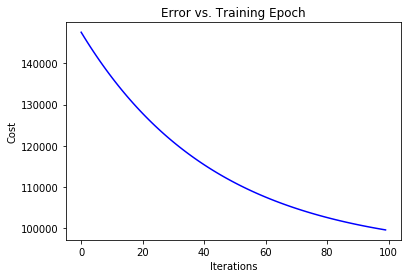

In [ ]:
#fig, ax = plt.subplots()  
plt.plot(np.arange(100), cl1, 'b')  
plt.xlabel('Iterations')  
plt.ylabel('Cost') 
plt.title('Error vs. Training Epoch') 
plt.show()